In [46]:
palette = ['#b42454','#f499ab','#fcc4d4','#f8a4a4','#e46c94']

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import rcParams
import warnings
warnings.filterwarnings('ignore')

In [52]:
pd.set_option('display.max_columns',100)
rcParams['axes.grid'] = True
rcParams['axes.spines.right'] = False
rcParams['axes.spines.top'] = False
plt.rc('axes',axisbelow=True)

In [3]:
makeup = pd.read_csv('D:/Data/Sociolla/group/makeup.csv')
makeup.head()

,link,brand,product_name,category,sub_category,price,rating,number_of_reviews,number_of_recommendations,repurchase_yes,repurchase_no,repurchase_maybe
0,https://www.sociolla.com/eyeshadow/14396-3-sha...,Pixy,3-Shades Eye Shadow,makeup,eyes,Rp 50.000,4.3,93.0,89.0,55.0,9.0,29.0
1,https://www.sociolla.com/mascara/7717-mascara-...,Maybelline,Mascara Magnum Big Shot,makeup,eyes,Rp 139.000,4.5,1200.0,1118.0,828.0,99.0,278.0
2,https://www.sociolla.com/eyeshadow/54750-gold-...,Lavie Lash,Gold Getter Eyeshadow,makeup,eyes,Rp 196.000,4.6,7.0,5.0,4.0,1.0,2.0
3,https://www.sociolla.com/false-eyelashes/24361...,Loreca,Delfin - Classic Collection,makeup,eyes,Rp 28.000,4.3,3.0,3.0,3.0,0.0,0.0
4,https://www.sociolla.com/eyeshadow/13894-eyelu...,LA GIRL,Eyelux Mesmerizing Eyeshadow,makeup,eyes,Rp 169.000Rp 118.300,4.3,4.0,4.0,1.0,1.0,2.0


In [5]:
makeup.shape

(1209, 12)

There are 1209 makeup product that I have collected from their website

In [6]:
makeup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   link                       1209 non-null   object 
 1   brand                      1176 non-null   object 
 2   product_name               1178 non-null   object 
 3   category                   1209 non-null   object 
 4   sub_category               1209 non-null   object 
 5   price                      1111 non-null   object 
 6   rating                     1047 non-null   float64
 7   number_of_reviews          1048 non-null   float64
 8   number_of_recommendations  1050 non-null   float64
 9   repurchase_yes             1056 non-null   float64
 10  repurchase_no              1056 non-null   float64
 11  repurchase_maybe           1056 non-null   float64
dtypes: float64(6), object(6)
memory usage: 113.5+ KB


We keep the link to check the product, if needed later

In [10]:
df = makeup.copy()

Let's clean the price because there are wrong formats like the last raw of the data shown above

1. Firstly, we'll put only data that the format already correct 

In [11]:
price_1 = [] 
#tens of thousands

for i in range(len(df.price)):
    if len(str(df.price[i])) == 6:
        price_1.append(np.array(df[df.price==df.price[i]].index).tolist())

In [12]:
price_fix1 = list()
for i in price_1:
    price_fix1.extend(i)

price_fix1 = pd.DataFrame(price_fix1).drop_duplicates()[0].sort_values().values.tolist()
len(price_fix1)

331

There are 331 products below Rp100.000

2. Let's put between Rp100.000 and Rp1.000.000

In [13]:
price_2 = [] 
#hundreds of thousands

for i in range(len(df.price)):
    if len(str(df.price[i]))==7:
        price_2.append(np.array(df[df.price==df.price[i]].index).tolist())

In [14]:
price_fix2 = []
for j in price_2:
    price_fix2.extend(j)
price_fix2 = pd.DataFrame(price_fix2).drop_duplicates()[0].sort_values().values.tolist()
len(price_fix2)

319

There are 319 products which cost between Rp100.000 and Rp1.000.000

In [15]:
price_3 = [] 
#millions

for i in range(len(df.price)):
    if len(str(df.price[i]))==9:
        price_3.append(np.array(df[df.price==df.price[i]].index).tolist())

In [16]:
price_fix3 = []
for j in price_3:
    price_fix3.extend(j)
price_fix3 = pd.DataFrame(price_fix3).drop_duplicates()[0].sort_values().values.tolist()
len(price_fix3)

2

- Take the products from main dataset

In [17]:
price1 = df.loc[price_fix1,:]
price2 = df.loc[price_fix2,:]
price3 = df.loc[price_fix3,:]

In [18]:
df_nofix = df.drop(index=(price_fix1+price_fix2+price_fix3),errors='ignore')
df_nofix

,link,brand,product_name,category,sub_category,price,rating,number_of_reviews,number_of_recommendations,repurchase_yes,repurchase_no,repurchase_maybe
4,https://www.sociolla.com/eyeshadow/13894-eyelu...,LA GIRL,Eyelux Mesmerizing Eyeshadow,makeup,eyes,169.000118.300,4.3,4.0,4.0,1.0,1.0,2.0
5,https://www.sociolla.com/eyeshadow/15507-twink...,Mineral Botanica,Twinkle Liquid Eyeshadow,makeup,eyes,89.90062.930,4.6,29.0,26.0,19.0,0.0,10.0
10,https://www.sociolla.com/eyes/47786-pro-curlin...,A'pieu,Pro-Curling Black Fixer Mascara,makeup,eyes,89.00044.500,4.7,207.0,152.0,161.0,10.0,36.0
12,https://www.sociolla.com/eyeshadow/15508-eyesh...,Mineral Botanica,Eyeshadow Pallete,makeup,eyes,179.900125.930,4.3,7.0,6.0,3.0,2.0,2.0
13,https://www.sociolla.com/eyeliner/10605-bold-i...,RIVERA,Bold Intense Waterproof Liquid Liner,makeup,eyes,NaN,3.9,6.0,5.0,1.0,2.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1202,https://www.sociolla.com/lip-cream/56768-lipsm...,Tutorrial,Lipsmear X Stefany Talitha,makeup,lips,119.00095.200,4.5,29.0,26.0,22.0,0.0,7.0
1203,https://www.sociolla.com/lip-stain/24950-gloss...,Emina,Glossy Stain,makeup,lips,47.50042.750,4.7,2200.0,2014.0,1800.0,37.0,337.0
1204,https://www.sociolla.com/lipstick/704-rouge-ed...,Bourjois,Rouge Edition 12H,makeup,lips,195.000117.000,4.4,12.0,12.0,5.0,0.0,7.0
1206,https://www.sociolla.com/lip-cream/17020-velve...,SAINT by Sandra,Velvet Matte Lipquid,makeup,lips,119.00071.400 - 119.000,4.0,13.0,8.0,2.0,5.0,6.0


The data above is what we need to fix the price column

## 1. Start with the products that have a discount, only one variant, and their prices are below Rp100.000 
- Their character length are 12

In [19]:
disc_1_var = []
for i in range(len(df.price)):
    if len(str(df.price[i]))==12:
        disc_1_var.append(np.array(df[df.price==df.price[i]].index).tolist())
    elif len(str(df.price[i]))==21:
        disc_1_var.append(np.array(df[df.price==df.price[i]].index).tolist())
len(disc_1_var)

158

143 products have a discount on 12 December 2021, but we only put the real price before their prices are cut by the discount

In [20]:
disc_1_var_fix = []
for k in disc_1_var:
    disc_1_var_fix.extend(k)

disc_1_var_fix = pd.DataFrame(disc_1_var_fix).drop_duplicates()[0].sort_values().values.tolist()
df.loc[disc_1_var_fix,'price'] = df.loc[disc_1_var_fix].price.str[:6]

## 2. Have a discount, only one variant, and their prices are between Rp100.000 and Rp1.000.000 
- Their character length are 14 and 13

In [21]:
disc_2_var = []
for i in range(len(df.price)):
    if len(str(df.price[i]))==14:
        disc_2_var.append(np.array(df[df.price==df.price[i]].index).tolist())
    elif len(str(df.price[i]))==13:
        disc_2_var.append(np.array(df[df.price==df.price[i]].index).tolist())
    elif len(str(df.price[i]))==24:
        disc_2_var.append(np.array(df[df.price==df.price[i]].index).tolist())
    elif len(str(df.price[i]))==23:
        disc_2_var.append(np.array(df[df.price==df.price[i]].index).tolist())
    
len(disc_2_var)

282

175 products have a discount on 12 December 2021, but we only put the real price before their prices are cut by the discount

In [22]:
disc_2_var_fix = []
for k in disc_2_var:
    disc_2_var_fix.extend(k)

disc_2_var_fix = pd.DataFrame(disc_2_var_fix).drop_duplicates()[0].sort_values().values.tolist()
df.loc[disc_2_var_fix,'price'] = df.loc[disc_2_var_fix].price.str[:7]

Check the data that still have a wrong format

In [23]:
df.drop(index=(disc_1_var_fix+disc_2_var_fix+price_fix1+price_fix2+price_fix3)).dropna().sample(6)

,link,brand,product_name,category,sub_category,price,rating,number_of_reviews,number_of_recommendations,repurchase_yes,repurchase_no,repurchase_maybe
816,https://www.sociolla.com/lip-cream/49504-ombre...,Dear Me Beauty,Ombre Lip Kit Caramel Mocha,makeup,lips,0,4.2,1.0,1.0,1.0,0.0,0.0
729,https://www.sociolla.com/setting-spray/14375-d...,Studio Tropik,Dreamsetter Setting Spray,makeup,face,64.900 - 192.50059.059 - 175.175,4.6,504.0,464.0,401.0,13.0,90.0
782,https://www.sociolla.com/pressed-powder/48737-...,Maybelline,FIT ME! 12H Oil Control Powder,makeup,face,64.000 - 75.000,4.6,288.0,243.0,215.0,10.0,63.0
289,https://www.sociolla.com/mascara/8988-badgal-b...,Benefit Cosmetics,BADgal Bang Mascara,makeup,eyes,230.000 - 440.000,4.4,25.0,21.0,13.0,4.0,8.0
874,https://www.sociolla.com/lip-cream/15137-vive-...,SAINT by Sandra,Vive Le Saint Package,makeup,lips,0,4.6,1.0,1.0,0.0,0.0,1.0
317,https://www.sociolla.com/eye-primer/55105-seei...,Urban Decay,Seeing Double,makeup,eyes,0,4.6,1.0,1.0,1.0,0.0,0.0


## 3. Fix the product prices that have more than one variant without discount
We'll just get the product that have the highest price. Thus, the number of reviews, recommendations, and repurchase don't count twice

In [24]:
var1 = []
var2 = []
for i in range(len(df.price)):
    if len(str(df.price[i]))==15:
        var1.append(np.array(df[df.price==df.price[i]].index).tolist())
for m in range(len(df.price)):
    if len(str(df.price[m]))==17:
        var2.append(np.array(df[df.price==df.price[m]].index).tolist())
print(len(var1))
print(len(var2))

3
2


In [25]:
var1_fix = []
for k in var1:
    var1_fix.extend(k)

var2_fix = []
for j in var2:
    var2_fix.extend(j)
    
var1_fix = pd.DataFrame(var1).drop_duplicates()[0].sort_values().values.tolist()
var2_fix = pd.DataFrame(var2).drop_duplicates()[0].sort_values().values.tolist()

df.loc[var1_fix,'price'] = df.loc[var1_fix].price.str[:7]
df.loc[var2_fix,'price'] = df.loc[var2_fix].price.str[:7]

In [26]:
df.drop(index=(disc_1_var_fix+disc_2_var_fix+price_fix1+price_fix2+price_fix3+var1_fix+var2_fix)).dropna()

,link,brand,product_name,category,sub_category,price,rating,number_of_reviews,number_of_recommendations,repurchase_yes,repurchase_no,repurchase_maybe
127,https://www.sociolla.com/eyeshadow/12448-9-col...,Focallure,9 Color Eyeshadow Pan,makeup,eyes,119.000 - 168.00076.160 - 107.520,4.6,400.0,378.0,255.0,12.0,133.0
317,https://www.sociolla.com/eye-primer/55105-seei...,Urban Decay,Seeing Double,makeup,eyes,0,4.6,1.0,1.0,1.0,0.0,0.0
465,https://www.sociolla.com/bb-cc-cream/58190-lng...,Laneige,LNG Neo Cushion-Glow No.21N Beige (OL21),makeup,face,590.000 - 751.000472.000 - 590.000,4.0,1.0,1.0,1.0,0.0,0.0
668,https://www.sociolla.com/bb-cc-cream/9749-m-pe...,Missha,M Perfect BB Cream SPF42 PA+++,makeup,face,137.500 - 379.50068.750 - 189.750,4.3,311.0,255.0,163.0,58.0,90.0
729,https://www.sociolla.com/setting-spray/14375-d...,Studio Tropik,Dreamsetter Setting Spray,makeup,face,64.900 - 192.50059.059 - 175.175,4.6,504.0,464.0,401.0,13.0,90.0
802,https://www.sociolla.com/lipstick/10067-color-...,Loreal Paris,Color Riche Matte,makeup,lips,69.000 - 75.00058.650 - 63.750,4.5,1200.0,1084.0,793.0,78.0,294.0
816,https://www.sociolla.com/lip-cream/49504-ombre...,Dear Me Beauty,Ombre Lip Kit Caramel Mocha,makeup,lips,0,4.2,1.0,1.0,1.0,0.0,0.0
874,https://www.sociolla.com/lip-cream/15137-vive-...,SAINT by Sandra,Vive Le Saint Package,makeup,lips,0,4.6,1.0,1.0,0.0,0.0,1.0
1009,https://www.sociolla.com/lip-cream/16703-power...,Make Over,Powerstay Transferproof Matte Lip cream,makeup,lips,125.000 - 131.000112.500 - 117.900,4.7,1200.0,1057.0,918.0,32.0,202.0
1063,https://www.sociolla.com/makeup/12822-les-mini...,SAINT by Sandra,"Les Minimaliste Crème Lipstick Set: Un, Deux, ...",makeup,lips,0,5.0,1.0,1.0,1.0,0.0,0.0


## 3. Fix the product prices that have more than one variant with discount
Same as before, we just put the highest price product that without discount

In [27]:
var3 = []
var4 = []
var5 = []
for i in range(len(df.price)):
    if len(str(df.price[i]))==30:
        var3.append(np.array(df[df.price==df.price[i]].index).tolist())

for a in range(len(df.price)):
    if len(str(df.price[a]))==32:
        var5.append(np.array(df[df.price==df.price[a]].index).tolist())

for k in range(len(df.price)):
    if len(str(df.price[k]))==33:
        var4.append(np.array(df[df.price==df.price[k]].index).tolist())
    elif len(str(df.price[k]))==34:
        var4.append(np.array(df[df.price==df.price[k]].index).tolist())
print(len(var3))
print(len(var4))
print(len(var5))

1
5
1


In [28]:
df.loc[pd.DataFrame(var3)[0],'price'] = df.loc[pd.DataFrame(var3)[0]].price.str[9:15]
df.loc[pd.DataFrame(var4)[0],'price'] = df.loc[pd.DataFrame(var4)[0]].price.str[10:17]
df.loc[pd.DataFrame(var5)[0],'price'] = df.loc[pd.DataFrame(var5)[0]].price.str[9:16]

In [29]:
df.loc[631,'price'] = 1100000
df['price'] = df.price.apply(lambda x:str(x).replace('.','')).astype(float)

# Create repurchase and recommendation rate column

- repurchase rate is the number of products purchased again by the customer per total 

In [30]:
df['repurchase_rate'] = df['repurchase_yes']/(df.repurchase_yes+df.repurchase_no+df.repurchase_maybe)
df['recommendation_rate'] = df['number_of_recommendations']/df.number_of_reviews
df.head()

,link,brand,product_name,category,sub_category,price,rating,number_of_reviews,number_of_recommendations,repurchase_yes,repurchase_no,repurchase_maybe,repurchase_rate,recommendation_rate
0,https://www.sociolla.com/eyeshadow/14396-3-sha...,Pixy,3-Shades Eye Shadow,makeup,eyes,50000.0,4.3,93.0,89.0,55.0,9.0,29.0,0.591398,0.956989
1,https://www.sociolla.com/mascara/7717-mascara-...,Maybelline,Mascara Magnum Big Shot,makeup,eyes,139000.0,4.5,1200.0,1118.0,828.0,99.0,278.0,0.687137,0.931667
2,https://www.sociolla.com/eyeshadow/54750-gold-...,Lavie Lash,Gold Getter Eyeshadow,makeup,eyes,196000.0,4.6,7.0,5.0,4.0,1.0,2.0,0.571429,0.714286
3,https://www.sociolla.com/false-eyelashes/24361...,Loreca,Delfin - Classic Collection,makeup,eyes,28000.0,4.3,3.0,3.0,3.0,0.0,0.0,1.000000,1.000000
4,https://www.sociolla.com/eyeshadow/13894-eyelu...,LA GIRL,Eyelux Mesmerizing Eyeshadow,makeup,eyes,169000.0,4.3,4.0,4.0,1.0,1.0,2.0,0.250000,1.000000


# Descriptive Statistics Table

In [76]:
df.describe()

,price,rating,number_of_reviews,number_of_recommendations,repurchase_yes,repurchase_no,repurchase_maybe,repurchase_rate,recommendation_rate
count,1.111000e+03,1047.000000,1048.000000,1050.000000,1056.000000,1056.000000,1056.000000,1056.000000,1048.000000
mean,1.481770e+05,4.438013,253.661260,229.125714,166.592803,26.651515,66.623106,0.620318,0.842395
std,1.393081e+05,0.315421,835.638206,763.720262,544.322398,107.205838,226.055318,0.224928,0.183571
min,0.000000e+00,1.800000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000e+04,4.300000,7.000000,5.000000,4.000000,0.000000,2.000000,0.500000,0.793558
50%,1.186000e+05,4.500000,30.000000,24.000000,18.000000,2.000000,7.000000,0.629422,0.894737
75%,1.790000e+05,4.600000,170.750000,151.750000,104.250000,16.000000,46.000000,0.750000,0.958814
max,1.106300e+06,5.000000,15700.000000,13494.000000,8000.000000,2700.000000,5000.000000,1.000000,1.000000


# Visualization

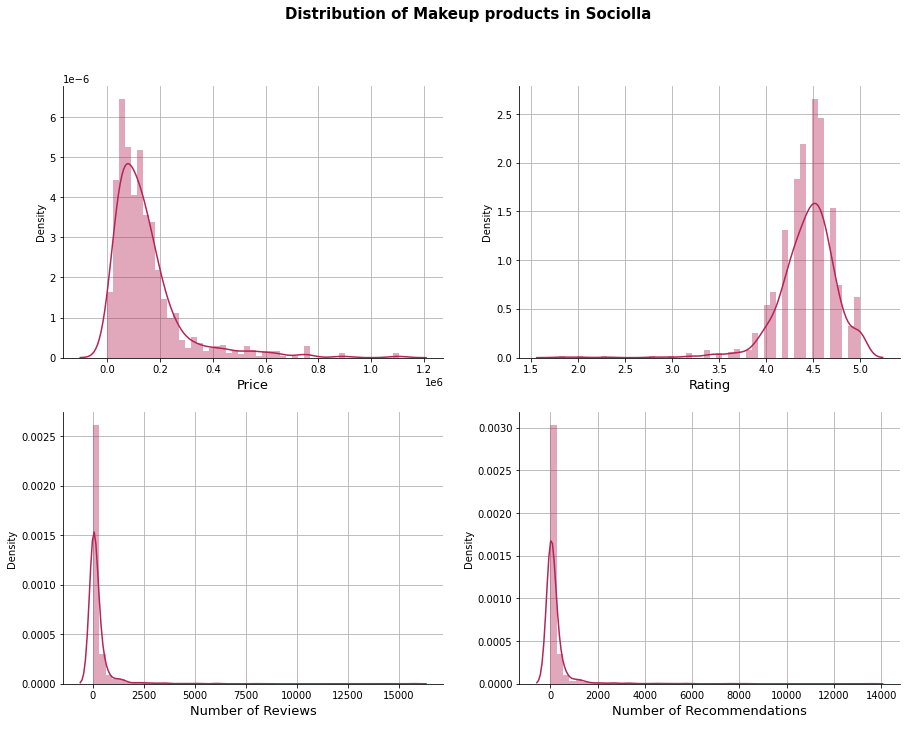

In [75]:
fig, ax = plt.subplots(2,2,figsize=(15,11))

sns.distplot(df.price,ax=ax[0,0],color=palette[0])
ax[0,0].set_xlabel('Price\n',size=13)

sns.distplot(df.rating,ax=ax[0,1],color=palette[0])
ax[0,1].set_xlabel('Rating\n',size=13)

sns.distplot(df.number_of_reviews,ax=ax[1,0],color=palette[0])
ax[1,0].set_xlabel('Number of Reviews\n',size=13)

sns.distplot(df.number_of_recommendations,ax=ax[1,1],color=palette[0])
ax[1,1].set_xlabel('Number of Recommendations\n',size=13)

plt.suptitle('Distribution of Makeup products in Sociolla\n\n',size=15,fontweight=550)
plt.show()

- What do we get ?

1.  Mostly, the price of makeup products in Sociollaare in range Rp0 and Rp2.000.000
2. 